### <span style="color:#336699">Dados</span>
<hr>
Os dados utilizados neste projeto foram obtidos do Repositório de Engenharia de Software Promise. <br>
Neste repositório estão disponiveis o resultado da aplicação de algumas métricas de software, dentre elas algumas métricas de McCabe e de Halstead

In [1]:
import pandas as pd
import numpy as np 
import glob, os
import matplotlib.pyplot as plt
import seaborn as sns


<br>
Listagem dos datasets presentes na pasta, todos estão em formato arff.

In [2]:
path = os.getcwd()
os.chdir("dataset2")
files = []
for file in glob.glob("*.arff"):
    files.append(file)
    print(file)

cm1.arff
jm1.arff
kc1.arff
kc2.arff
pc1.arff


<br>
Conteudo do arquivo KC4.

In [3]:
CM1 = open("pc1.arff", 'r')
content = CM1.read()
print(content)


@relation CM1

@attribute loc numeric
@attribute v(g) numeric
@attribute ev(g) numeric
@attribute iv(g) numeric
@attribute n numeric
@attribute v numeric
@attribute l numeric
@attribute d numeric
@attribute i numeric
@attribute e numeric
@attribute b numeric
@attribute t numeric
@attribute lOCode numeric
@attribute lOComment numeric
@attribute lOBlank numeric
@attribute locCodeAndComment numeric
@attribute uniq_Op numeric
@attribute uniq_Opnd numeric
@attribute total_Op numeric
@attribute total_Opnd numeric
@attribute branchCount numeric
@attribute defects {false,true}

@data

1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,2,2,2,2,1.2,1.2,1.2,1.2,1.4,false
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,true
91,9,3,2,318,2089.21,0.04,27.68,75.47,57833.24,0.7,3212.96,80,44,11,31,29,66,192,126,17,true
109,21,5,18,381,2547.56,0.04,28.37,89.79,72282.68,0.85,4015.7,97,41,12,24,28,75,229,152,38,true
505,106,41,82,2339,20696.93,0.01,75.93,272.58,1571506.88,6.9,87305.94,457,71,48,49,64,397,1397,942

Os dados não podem ser analisados como estão pois todos os arquivos contém o mesmo texto inicial exposto anteriormente. <br>
A função abaixo é responsável por remover as linhas que não correspondem a dados e criar arquivos csv com o cabeçalho e dados formatados.

In [4]:
def cleanDataset(file):
    f = open(file)
    newfilename = file.split('.')
    output = []
    i = 0;

    for line in f:
        if(i>26):
            output.append(line)
        i = i+1
    
    f.close()
    newfile = open(newfilename[0]+".csv", 'w+')
    newfile.write("McCabe_loc,McCabe_v(g),McCabe_ev(g),McCabe_iv(g),Halstead_n,Halstead_v,Halstead_l,Halstead_d,Halstead_i,Halstead_e,Halstead_b,Halstead_t,Halstead_lOCode,Halstead_lOComment,Halstead_lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects"+"\n")

    newfile.writelines(output)
    f.close()

É necessário chamar a função criada passando como parrametro cada um dos arquivos do diretório.

In [5]:
for file in files:
    cleanDataset(file)

Após a execução da função pode-se observar que os arquivos csv foram criados.

In [6]:
os.chdir(os.getcwd())
for file in glob.glob("*.csv"):
    print(file)

cm1.csv
dataset_completo.csv
dataset_halstead.csv
dataset_McCabe.csv
jm1.csv
kc1.csv
kc2.csv
pc1.csv


In [7]:
CM1 = pd.read_csv('CM1.csv')
JM1 = pd.read_csv('JM1.csv')
KC1 = pd.read_csv('KC1.csv')
KC2 = pd.read_csv('KC2.csv')
PC1 = pd.read_csv('PC1.csv')

Para unificar os datasets e manter o software que cada dataset está relacionado, foi adicionado mais uma coluna contendo esta informação.

In [8]:
CM1['SOFTWARE'] = "CM1"
JM1['SOFTWARE'] = "JM1"
KC1['SOFTWARE'] = "KC1"
KC2['SOFTWARE'] = "KC2"
PC1['SOFTWARE'] = "PC1"

Após adicionar as informações descritas anteriormente, é possivel realizar a junção dos datasets.

In [9]:
data = pd.concat([CM1,JM1,KC1,KC2,PC1], ignore_index=True, sort=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15123 entries, 0 to 15122
Data columns (total 23 columns):
Halstead_b            15123 non-null float64
Halstead_d            15123 non-null float64
Halstead_e            15123 non-null float64
Halstead_i            15123 non-null float64
Halstead_l            15123 non-null float64
Halstead_lOBlank      15123 non-null int64
Halstead_lOCode       15123 non-null int64
Halstead_lOComment    15123 non-null int64
Halstead_n            15123 non-null float64
Halstead_t            15123 non-null float64
Halstead_v            15123 non-null float64
McCabe_ev(g)          15123 non-null float64
McCabe_iv(g)          15123 non-null float64
McCabe_loc            15123 non-null float64
McCabe_v(g)           15123 non-null float64
SOFTWARE              15123 non-null object
branchCount           15123 non-null object
defects               15123 non-null object
locCodeAndComment     15123 non-null int64
total_Op              15123 non-null object
tot

A coluna Defective deve ser do tipo boolean, para realizar essa alteração foi utilizada a solução encontrada em https://stackoverflow.com/questions/17702272/convert-pandas-series-containing-string-to-boolean

In [11]:
data['defects']

0        False
1         True
2        False
3        False
4        False
         ...  
15118    False
15119    False
15120    False
15121    False
15122    False
Name: defects, Length: 15123, dtype: object

In [12]:
d = {False: 0,"no":0, True: 1,"yes":1}
data['defects'] = data['defects'].map(d)

In [13]:
l = {'CM1': 0,'JM1': 1,'KC1': 2,'KC2': 3,'PC1': 4}
data['SOFTWARE'] = data['SOFTWARE'].map(l)

In [14]:
data.head()

,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1,1,1,1,1,1,1
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9,0,0,44,19,15,15
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7,0,0,31,16,16,8
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11,0,0,46,26,16,12


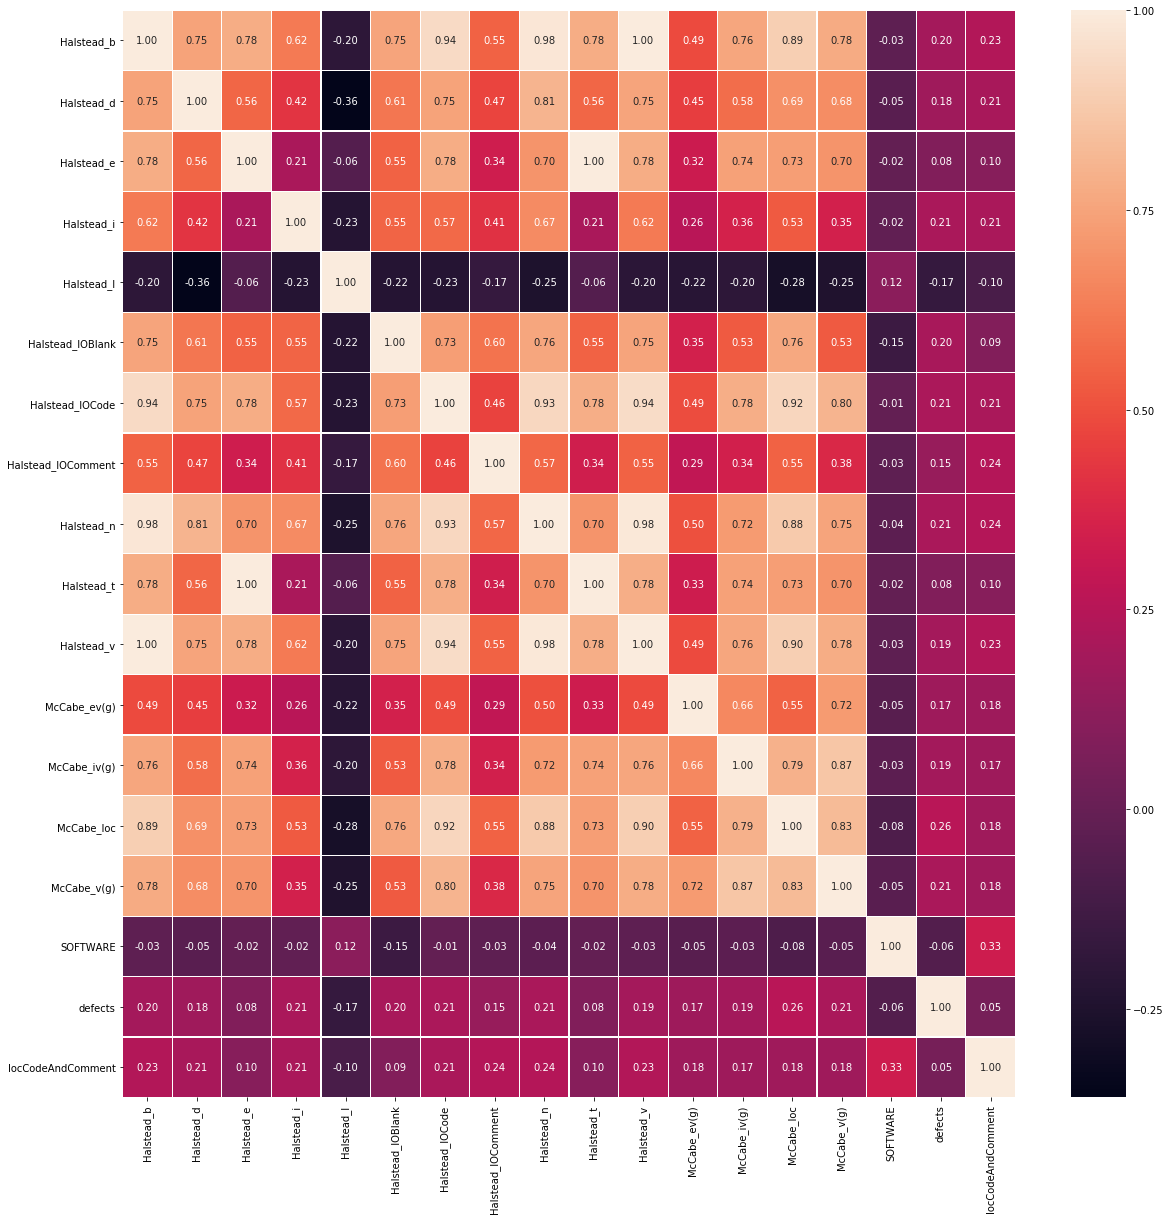

In [15]:
f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

In [16]:
data.to_csv('dataset_completo.csv', index=False)

In [17]:
data.head()

,Halstead_b,Halstead_d,Halstead_e,Halstead_i,Halstead_l,Halstead_lOBlank,Halstead_lOCode,Halstead_lOComment,Halstead_n,Halstead_t,...,McCabe_loc,McCabe_v(g),SOFTWARE,branchCount,defects,locCodeAndComment,total_Op,total_Opnd,uniq_Op,uniq_Opnd
0,1.30,1.30,1.30,1.30,1.30,2,2,2,1.3,1.30,...,1.1,1.4,0,1.4,0,2,1.2,1.2,1.2,1.2
1,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.00,...,1.0,1.0,0,1,1,1,1,1,1,1
2,0.10,9.50,2936.77,32.54,0.11,6,1,0,63.0,163.15,...,24.0,5.0,0,9,0,0,44,19,15,15
3,0.07,16.00,3447.89,13.47,0.06,3,0,0,47.0,191.55,...,20.0,4.0,0,7,0,0,31,16,16,8
4,0.12,17.33,5999.58,19.97,0.06,3,0,0,72.0,333.31,...,24.0,6.0,0,11,0,0,46,26,16,12


Seleção apenas das métricas de Halstead

In [18]:
Halstead_data = data[["Halstead_n","Halstead_v","Halstead_l","Halstead_d","Halstead_i","Halstead_e","Halstead_b","Halstead_t","Halstead_lOCode","Halstead_lOComment","Halstead_lOBlank",'SOFTWARE','defects']]

In [19]:
Halstead_data.to_csv('dataset_halstead.csv', index=False)

In [20]:
Halstead_data.head()

,Halstead_n,Halstead_v,Halstead_l,Halstead_d,Halstead_i,Halstead_e,Halstead_b,Halstead_t,Halstead_lOCode,Halstead_lOComment,Halstead_lOBlank,SOFTWARE,defects
0,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,0,0
1,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,0,1
2,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,0
3,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,0
4,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,0


In [22]:
McCabe_data = data[["McCabe_loc","McCabe_v(g)","McCabe_ev(g)","McCabe_iv(g)",'SOFTWARE','defects']]
McCabe_data.to_csv('dataset_McCabe.csv', index=False)

In [23]:
McCabe_data.head()

,McCabe_loc,McCabe_v(g),McCabe_ev(g),McCabe_iv(g),SOFTWARE,defects
0,1.1,1.4,1.4,1.4,0,0
1,1.0,1.0,1.0,1.0,0,1
2,24.0,5.0,1.0,3.0,0,0
3,20.0,4.0,4.0,2.0,0,0
4,24.0,6.0,6.0,2.0,0,0


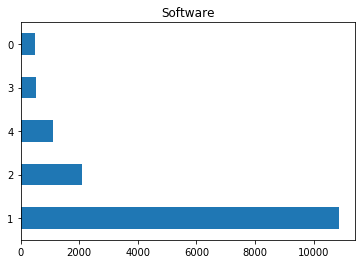

In [24]:
data['SOFTWARE'].value_counts().plot.barh(title="Software")

### <span style="color:#336699">Referências</span>
<hr>
D. Gray, D. Bowes, N. Davey, Y. Sun and B. Christianson, "The misuse of the NASA metrics data program data sets for automated software defect prediction," 15th Annual Conference on Evaluation & Assessment in Software Engineering (EASE 2011), Durham, 2011, pp. 96-103.
doi: 10.1049/ic.2011.0012
keywords: {data mining;fault tolerant computing;NASA metrics data program data set;automated software defect prediction;data cleansing process},
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6083167&isnumber=6083155